In [116]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import os
from dateutil import parser

In [6]:
files = os.listdir('./charts')

In [20]:
aapl1440 = pd.read_csv('./charts/APPLE1440.csv')

aaple_m1 = aapl1440[aapl1440['date'].str.contains('2018.01.', na=False)]
aaple_m1

,date,time,open,high,low,close,unknown
870,2018.01.02,00:00,169.99,172.24,169.25,172.09,41108
871,2018.01.03,00:00,172.50,174.54,171.83,171.85,43686
872,2018.01.04,00:00,172.75,173.46,172.07,173.16,41074
873,2018.01.05,00:00,173.54,175.21,173.03,174.95,43982
874,2018.01.08,00:00,174.53,175.57,173.91,174.17,40778
875,2018.01.09,00:00,174.60,175.04,173.37,174.02,47565
876,2018.01.10,00:00,173.15,174.28,172.97,174.08,49174
877,2018.01.11,00:00,174.63,175.47,174.37,175.24,41227
878,2018.01.12,00:00,176.31,177.33,175.58,176.98,48792
879,2018.01.16,00:00,178.27,179.38,176.12,176.19,64553


In [102]:
def filter_articles(news_dir):
  news_files = os.listdir(news_dir)

  news_info = []
  for file in news_files:
      with open(f'./{news_dir}/{file}') as article:
        article_content = json.load(article)
        aapl = -1
        amzn = -1
        for org in article_content['entities']['organizations']:
          if ('apple' in article_content['text'].lower()) and aapl < 0:
            news_info.append(['aapl', article_content['published'], article_content['text'], f'{news_dir}/{file}'])
            aapl *= -1

          if ('amazon' in article_content['text'].lower()) and amzn < 0:
            news_info.append(['amzn', article_content['published'], article_content['text'], f'{news_dir}/{file}'])
            amzn *= -1
  return news_info


In [173]:
news_dirs = os.listdir('./news')

ndf= []
for news_dir in news_dirs:
    ndf += filter_articles(f'./news/{news_dir}')

print(len(ndf))

82294


In [174]:
news_data = pd.DataFrame(ndf, columns=['company', 'date','text','file'])
news_data

,company,date,text,file
0,aapl,2018-08-13T03:00:00.000+03:00,"\nKAYLA TAUSCHE, NIGHTLY BUSINESS REPORT CORRE...",./news/2018_08_d157b48c57be246ec7dd80e7af4388a...
1,aapl,2018-08-31T12:13:00.000+03:00,\nEdgewood Management LLC lowered its stake in...,./news/2018_08_d157b48c57be246ec7dd80e7af4388a...
2,aapl,2018-08-27T22:27:00.000+03:00,"Dow jumps more than 250 points, Nasdaq hits 8,...",./news/2018_08_d157b48c57be246ec7dd80e7af4388a...
3,amzn,2018-08-27T22:27:00.000+03:00,"Dow jumps more than 250 points, Nasdaq hits 8,...",./news/2018_08_d157b48c57be246ec7dd80e7af4388a...
4,aapl,2018-08-02T02:01:00.000+03:00,"South Korea Market May Give Up Support At 2,30...",./news/2018_08_d157b48c57be246ec7dd80e7af4388a...
...,...,...,...,...
82289,aapl,2018-12-27T02:23:00.000+02:00,Google's Hardware Ambitions Are Starting to Pa...,./news/2018_12_d157b48c57be246ec7dd80e7af4388a...
82290,aapl,2018-12-13T16:46:00.000+02:00,"ETF Preview: ETFs, Futures Point Higher as Str...",./news/2018_12_d157b48c57be246ec7dd80e7af4388a...
82291,aapl,2018-12-06T02:00:00.000+02:00,"After a one-day break, the stock market contin...",./news/2018_12_d157b48c57be246ec7dd80e7af4388a...
82292,aapl,2018-12-14T16:44:00.000+02:00,\nLaurel Wealth Advisors Inc. lifted its posit...,./news/2018_12_d157b48c57be246ec7dd80e7af4388a...


In [178]:
news_data['date'] = pd.to_datetime(news_data['date'], utc=True)
news_dates = news_data['date'].dt.date
news_times = news_data['date'].dt.time

news_data['date'] = news_dates
news_data['time'] = news_times

In [179]:
news_data.to_csv('news_data.csv',index=False)

In [180]:
apple_news = news_data[news_data['company'] == 'aapl']

In [275]:
aapl1440['date'] = aapl1440['date'].apply(lambda x: x.replace('.', '-'))
stock = aapl1440[aapl1440['date'] >= '2018-01-01'][['date', 'open']]
stock['open'] = stock['open'].astype(float)
stock['date'] = pd.to_datetime(stock['date'])

stock=stock.set_index('date')
stock

,open
date,
2018-01-02,169.99
2018-01-03,172.50
2018-01-04,172.75
2018-01-05,173.54
2018-01-08,174.53
...,...
2019-01-28,156.25
2019-01-29,156.47
2019-01-30,161.68


In [253]:
apple_news_days = apple_news[apple_news['date'] >= pd.Timestamp('2018-01-01')].groupby(by=['date']).count()
# apple_news.iloc[0]
apple_news_days

/tmp/ipykernel_92321/397951160.py:1: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  apple_news_days = apple_news[apple_news['date'] >= pd.Timestamp('2018-01-01')].groupby(by=['date']).count()


,company,text,file,time
date,,,,
2018-01-01,60,60,60,60
2018-01-02,164,164,164,164
2018-01-03,161,161,161,161
2018-01-04,155,155,155,155
2018-01-05,271,271,271,271
...,...,...,...,...
2019-02-03,92,92,92,92
2019-02-04,176,176,176,176
2019-02-05,166,166,166,166


In [277]:
dates = np.zeros((len(apple_news_days) ,2),dtype=object)
dates[:,0] = np.arange(np.datetime64("2018-01-01"), np.datetime64("2019-02-08"), np.timedelta64(1, "D"))

# print(dates)
dates_df = pd.DataFrame(dates,columns=['date', 'dummy'])
dates_df['date'] = pd.to_datetime(dates_df['date'])
dates_df=dates_df.set_index('date')
dates_df

,dummy
date,
2018-01-01,0
2018-01-02,0
2018-01-03,0
2018-01-04,0
2018-01-05,0
...,...
2019-02-03,0
2019-02-04,0
2019-02-05,0


In [278]:
dates_df.index

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10',
               ...
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-02', '2019-02-03', '2019-02-04', '2019-02-05',
               '2019-02-06', '2019-02-07'],
              dtype='datetime64[ns]', name='date', length=403, freq=None)

In [276]:
stock.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-16',
               ...
               '2019-01-18', '2019-01-22', '2019-01-23', '2019-01-24',
               '2019-01-25', '2019-01-28', '2019-01-29', '2019-01-30',
               '2019-01-31', '2019-02-01'],
              dtype='datetime64[ns]', name='date', length=273, freq=None)

In [280]:
dates_df = dates_df.join(stock)

In [282]:
dates_df = dates_df.join(apple_news_days)
dates_df = dates_df.dropna()
dates_df

,dummy,open,company,text,file,time
date,,,,,,
2018-01-02,0,169.99,164,164,164,164
2018-01-03,0,172.50,161,161,161,161
2018-01-04,0,172.75,155,155,155,155
2018-01-05,0,173.54,271,271,271,271
2018-01-08,0,174.53,130,130,130,130
...,...,...,...,...,...,...
2019-01-28,0,156.25,232,232,232,232
2019-01-29,0,156.47,358,358,358,358
2019-01-30,0,161.68,469,469,469,469


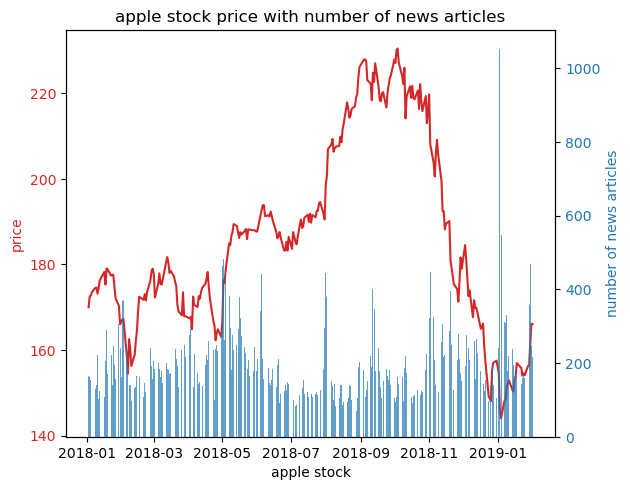

In [290]:
# plt.plot(dates_df['open'])
# plt.bar(dates_df.index,dates_df['company'])

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('apple stock')
ax1.set_ylabel('price', color=color)
ax1.plot(dates_df.index, dates_df['open'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('number of news articles', color=color)  # we already handled the x-label with ax1
ax2.bar(dates_df.index,dates_df['company'], color=color, alpha=0.7)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('apple stock price with number of news articles')
plt.show()